# Settings

## Libraries

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
from string import punctuation

import pandas as pd
import unidecode
import nltk

import matplotlib.pyplot as plt

## Databases

In [103]:
df = pd.read_csv('imdb-reviews.csv')
df.head(4)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg


## Methods

In [104]:
def removing_irrelevant_data(text, stop_words):
    
    text = text.lower()
    phrase = ''
    
    # removing suffixes
    stemmer = nltk.RSLPStemmer()
    
    # spliting text and removing punctuation
    punctuation_remover = nltk.tokenize.WordPunctTokenizer()
    text = punctuation_remover.tokenize(text)
    
    # removing stopwords
    for word in text:
        if word not in stop_words:
            word = stemmer.stem(word)
            phrase += f'{word} '        
            
    return phrase

# Model

In [105]:
# removing accents
df['text_cleaned'] = df.text_pt.apply(lambda x: unidecode.unidecode(x))

In [106]:
# transform target in numeric values
df.sentiment = df.sentiment.replace({'pos':1, 'neg':0})

In [107]:
# removing stop words and punctuation
list_punctuation = [x for x in punctuation]
stop_words = nltk.corpus.stopwords.words('portuguese')
irrelevant_data = list_punctuation + stop_words

# As the accents were removed from the text, It should be done in the list of irrelevant too
irrelevant_data = [unidecode.unidecode(x) for x in irrelevant_data] 

# removing
df['text_cleaned'] = df['text_cleaned'].apply(removing_irrelevant_data, stop_words=irrelevant_data)

In [108]:
vectorizer = CountVectorizer(max_features=100)  # it will select the n words that most appear
bag_of_words = vectorizer.fit_transform(df.text_cleaned)  # when vetorizing, the machine auto apply a lower function
columns = vectorizer.get_feature_names_out()

bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=columns)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df.sentiment, test_size=0.25)

In [110]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [111]:
lr_model.score(x_test, y_test)

0.7425798625151637

# Analysis

In [112]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [113]:
def generate_wc(df: pd.DataFrame, col: str, condition: str = None) -> None:
    if condition:
        df = df.query(condition)

    list_phrases = df[col].to_list()
    unique_string = ' '.join(list_phrases)

    wc = WordCloud(width=800, height=500, collocations=False,
                   max_font_size=100)
    wc = wc.generate(unique_string)

    plt.figure(figsize=(15, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [120]:
# unique_str = ' '.join(df.text_cleaned)
a = df[df.sentiment == 0]
unique_str = ' '.join(a.text_cleaned)

tokenizer = nltk.tokenize.WhitespaceTokenizer()
list_tokens = tokenizer.tokenize(unique_str)

freq_tokens = nltk.FreqDist(list_tokens)
freq_tokens

FreqDist({'film': 101089, 'pod': 23296, 'tod': 22542, 'algum': 20761, 'faz': 19995, 'real': 18377, 'parec': 16683, 'sobr': 14507, 'tao': 14340, 'outr': 14001, ...})

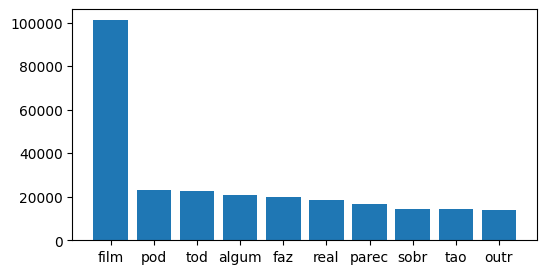

In [121]:
df_freq_tokens = pd.DataFrame({'word':freq_tokens.keys(), 'freq':freq_tokens.values()})
df_freq_tokens = df_freq_tokens.nlargest(n=10, columns='freq')

plt.figure(figsize=(6,3))
plt.bar(x='word', height='freq', data=df_freq_tokens)
plt.show()

# Notes

- stemming technique --> Remove suffixes, to be possible to analyze similiar words with the same meaning as one

In [ ]:
# example
stemmer = nltk.RSLPStemmer()  # this stemmer is specific for portuguese
stemmer.stem('marginalização')

'margin'

*The most frequent words, has no semantic relevance*  
*Those words dont help to make a distintion between the two sentments*